# Deep Learning Word2Vec Assignment

Part 1: Semantic Analysis with Word2Vec
1. Word Embeddings Generation:

• Use the Gensim library to train a Word2Vec model on a dataset (Shakespeare dataset or another corpus
of your choice).

• Generate word embeddings for the vocabulary of the corpus.
2. Semantic Similarity:

• Implement a function to find the k most similar words to a given word based on the trained Word2Vec
embeddings.

• Test the function with several words, including both common and unusual words from the corpus.

3. Word Analogy Task:

• Create a function that solves word analogies using the embeddings. The function should take three words
as input: word1, word2, word3, and predict a word4 such that word1 is to word2 as word3 is to word4.

• Test this function with at least 5 different word sets.

In [1]:
#!pip install gensim numpy nltk

In [1]:
# Import necessary libraries
import gensim
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
import nltk
import numpy as np

In [2]:
# Download NLTK data for tokenization
nltk.download('punkt')

# Load the Shakespeare dataset or any other corpus
corpus_path = 'Shakespeare.txt'
with open(corpus_path, 'r', encoding='utf-8') as file:
    corpus = file.read()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [3]:
# Tokenize the corpus
tokenized_corpus = [word_tokenize(sentence.lower()) for sentence in nltk.sent_tokenize(corpus)]

In [4]:
# Train Word2Vec model
model = Word2Vec(sentences=tokenized_corpus, vector_size=100, window=5, min_count=1, workers=5)

In [5]:
# Function to find k most similar words
def find_similar_words(word, k=5):
    similar_words = model.wv.most_similar(word, topn=k)
    return similar_words

In [6]:
# Test similarity function
print("Similar words to 'queen':", find_similar_words('queen'))


Similar words to 'queen': [('prince', 0.8835061192512512), ('edward', 0.8520456552505493), ('duke', 0.8314784169197083), ('talbot', 0.8165407776832581), ('uncle', 0.8129514455795288)]


In [7]:
# Test similarity function
print("Similar words to 'love':", find_similar_words('love'))

Similar words to 'love': [('honour', 0.8329340219497681), ('fear', 0.7831326723098755), ('mind', 0.7742968201637268), ('service', 0.7741389870643616), ('praise', 0.7707477807998657)]


In [8]:
# Test similarity function
print("Similar words to 'sad':", find_similar_words('sad'))

Similar words to 'sad': [('counterfeit', 0.8691274523735046), ('afoot', 0.867260217666626), ('penitent', 0.8621577024459839), ('justly', 0.8616181015968323), ('mated', 0.860101044178009)]


In [9]:
# Test similarity function
print("Similar words to 'own':", find_similar_words('own'))

Similar words to 'own': [('honour', 0.8144571781158447), ('only', 0.7515467405319214), ('eye', 0.7494300007820129), ('tears', 0.7460199594497681), ('ear', 0.7388452291488647)]


In [10]:
# Test similarity function
print("Similar words to 'misuse':", find_similar_words('misuse'))

Similar words to 'misuse': [('gather', 0.886717677116394), ('suppose', 0.8862058520317078), ('govern', 0.8822861909866333), ('dry', 0.872860312461853), ('corrupt', 0.8728272318840027)]


In [11]:
# Test similarity function
print("Similar words to 'jester':", find_similar_words('jester'))

Similar words to 'jester': [('count', 0.8560357689857483), ('creature', 0.8421004414558411), ('apartment', 0.8372412919998169), ('widow', 0.8366355895996094), ('physician', 0.8320467472076416)]


In [12]:
# Function for word analogy task
def word_analogy_task(word1, word2, word3, k=1):
    try:
        word4 = model.wv.most_similar(positive=[word2, word3], negative=[word1], topn=k)[0][0]
        return word4
    except KeyError:
        return f"Words not in vocabulary: {word1}, {word2}, {word3}"

In [13]:
# Test word analogy function
word_sets = [('king', 'queen', 'man', 1),
             ('paris', 'france', 'london', 1),
             ('good', 'better', 'bad', 2),
             ('sun', 'day', 'moon', 4),
             ('fish', 'water', 'bird', 2),
              ('cat', 'kitten', 'dog', 2),
            ('happy', 'happier', 'sad', 2),
              ('book', 'author', 'song', 2)]

for word_set in word_sets:
    word1, word2, word3, k = word_set
    predicted_word = word_analogy_task(word1, word2, word3, k)
    print(f"{word1} : {word2} :: {word3} : {predicted_word}")

king : queen :: man : soldier
paris : france :: london : venice
good : better :: bad : greater
sun : day :: moon : night
fish : water :: bird : spring
cat : kitten :: dog : votarist
happy : happier :: sad : dalliance
book : author :: song : idol


In [14]:
# Save the Word2Vec model
model.save("word2vec_model")

Part 3: Visualization (Optional)

• Use PCA or t-SNE to visualize the high-dimensional word embeddings in two dimensions.

• Plot the embeddings for a select set of words and their closest neighbors.

In [17]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import numpy as np
import matplotlib.pyplot as plt


In [18]:
# Visualize word embeddings using PCA
def plot_embeddings(words, embeddings, title):
    pca = PCA(n_components=2)
    reduced_embeddings = pca.fit_transform(embeddings)

    plt.figure(figsize=(10, 8))
    plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1], c='blue', edgecolors='k')
    for i, word in enumerate(words):
        plt.annotate(word, (reduced_embeddings[i, 0], reduced_embeddings[i, 1]))

    plt.title(title)
    plt.show()

In [19]:
# Select a set of words for visualization
visualization_words = ['love', 'king', 'queen', 'sword', 'forest', 'ship', 'war', 'peace']

In [20]:
# Get embeddings for visualization words
embeddings = [model.wv[word] for word in visualization_words]

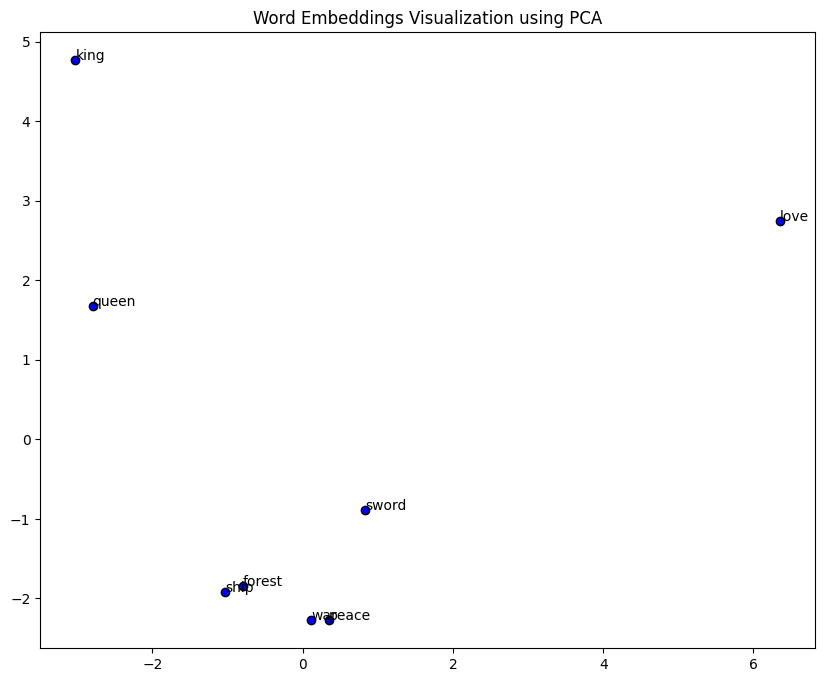

In [21]:
# Plot the embeddings using PCA
plot_embeddings(visualization_words, embeddings, 'Word Embeddings Visualization using PCA')
